In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import os

In [2]:
%pwd
os.chdir('C:\\Users\\abelb\\Desktop\\pasar')

In [3]:
df = pd.read_csv('REE.MC.csv', index_col = 'Date', parse_dates= True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,1.5225,1.5400,1.4000,1.4375,0.055525,10309428
2000-01-31,1.4725,3.1125,1.3425,2.7000,0.104291,110717444
2000-02-29,2.7750,2.8425,2.3750,2.5700,0.099270,65415856
2000-03-31,2.5875,2.6875,2.2500,2.5250,0.097531,17490296
2000-04-30,2.5700,2.8700,2.5250,2.8425,0.109795,32532768


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217 entries, 1999-12-31 to 2017-12-31
Data columns (total 6 columns):
Open         217 non-null float64
High         217 non-null float64
Low          217 non-null float64
Close        217 non-null float64
Adj Close    217 non-null float64
Volume       217 non-null int64
dtypes: float64(5), int64(1)
memory usage: 11.9 KB


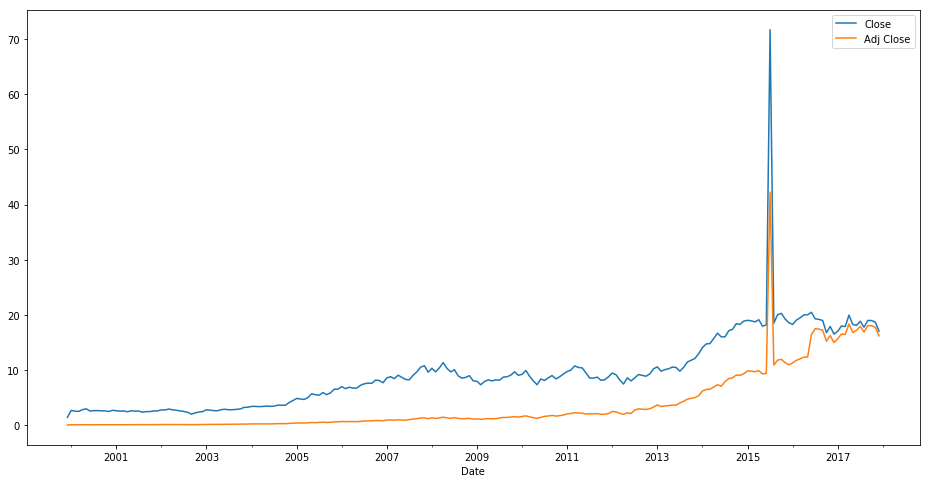

In [6]:
df[['Close', 'Adj Close']].plot(figsize=(16,8));

In [7]:
df['Adj Close'].argmax()

C:\Users\abelb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2015-07-31 00:00:00')

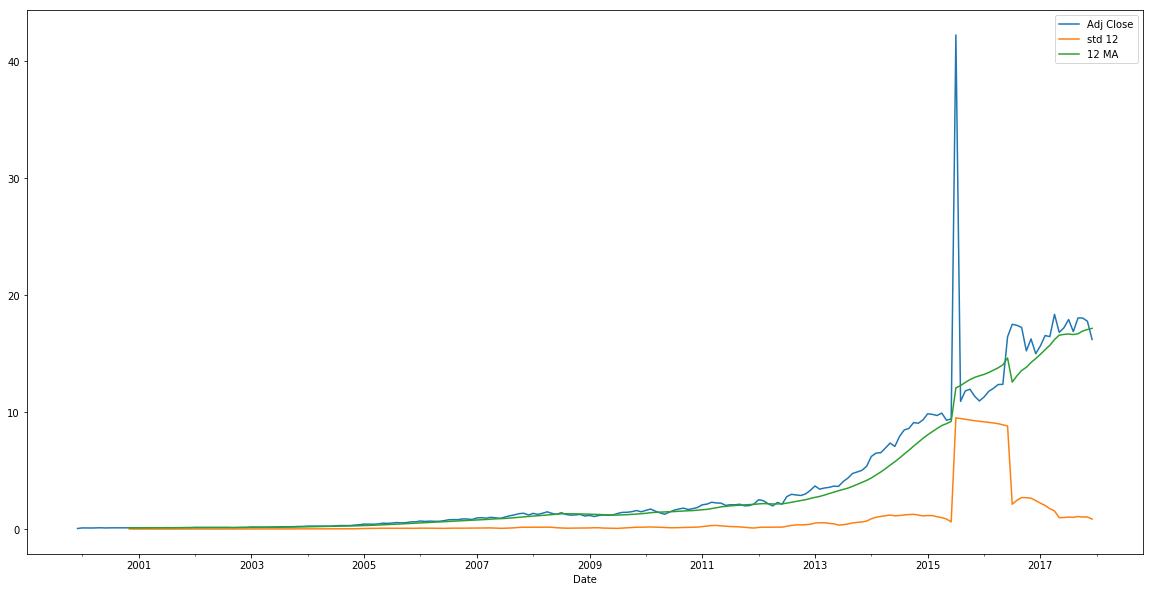

In [8]:
df['Adj Close'].plot(figsize=(20,10))
df['Adj Close'].rolling(12).std().plot(label = 'std 12')
df['Adj Close'].rolling(12).mean().plot(label = '12 MA')
plt.legend();

In [9]:
df['returns'] = df['Adj Close'].pct_change()

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1999-12-31,1.5225,1.5400,1.4000,1.4375,0.055525,10309428,NaN
2000-01-31,1.4725,3.1125,1.3425,2.7000,0.104291,110717444,0.878271
2000-02-29,2.7750,2.8425,2.3750,2.5700,0.099270,65415856,-0.048144
2000-03-31,2.5875,2.6875,2.2500,2.5250,0.097531,17490296,-0.017518
2000-04-30,2.5700,2.8700,2.5250,2.8425,0.109795,32532768,0.125745


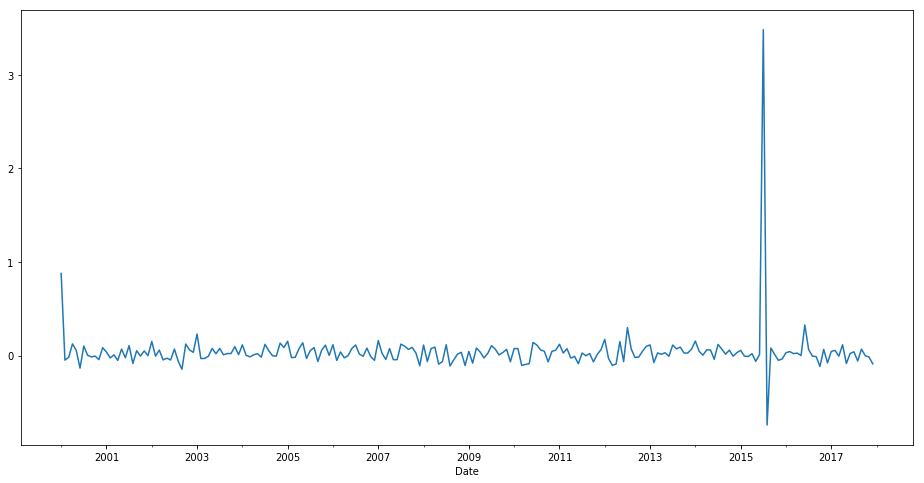

In [11]:
df['returns'].plot(figsize = (16,8));

In [12]:
def standarizar (data):
    return (data - data.mean()) / data.std()

In [17]:
retornos_standarizados_MA20 = standarizar(df.returns).rolling(12).mean()

Text(0.5,1,'retornos estandarizados')

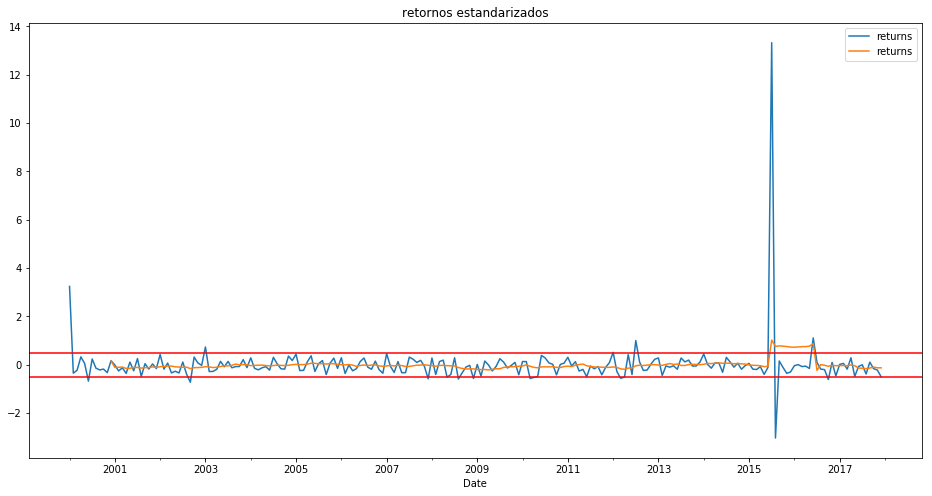

In [57]:
standarizar(df.returns).plot(figsize = (16,8))
retornos_standarizados_MA20.plot()
plt.axhline(0.5, color = 'r')
plt.axhline(-0.5, color = 'r')
plt.legend()
plt.title('retornos estandarizados')


In [19]:
retornos_std = standarizar(df.returns)

In [50]:
intervalos_100_std = pd.cut(retornos_std,20)

In [51]:
intervalos_frame = pd.DataFrame(pd.value_counts(intervalos_100_std))

In [52]:
retornos_std_df= pd.DataFrame(retornos_std)

In [53]:
intervalos_frame

,returns
"(-0.581, 0.236]",178
"(0.236, 1.054]",29
"(-1.399, -0.581]",5
"(12.503, 13.321]",1
"(2.69, 3.507]",1
"(1.054, 1.872]",1
"(-3.051, -2.217]",1
"(6.779, 7.596]",0
"(5.961, 6.779]",0
"(5.143, 5.961]",0


In [59]:
time_series = df['Adj Close']

In [64]:
time_series = pd.DataFrame(time_series)
time_series.head()

,Adj Close
Date,
1999-12-31,0.055525
2000-01-31,0.104291
2000-02-29,0.099270
2000-03-31,0.097531
2000-04-30,0.109795


In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:
decomp = seasonal_decompose(time_series)

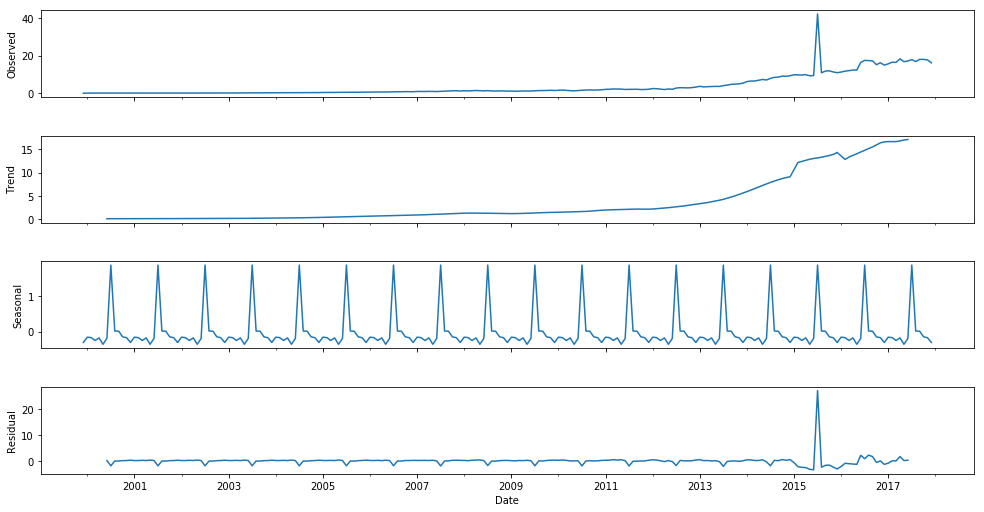

In [70]:
a = decomp.plot()
a.set_size_inches(15,8)

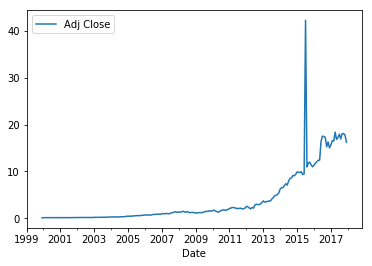

In [69]:
time_series.plot()

In [71]:
from statsmodels.tsa.arima_model import ARIMA

In [75]:
model = sm.tsa.statespace.SARIMAX(df['Adj Close'], order = (0,1,0), seasonal_order = (1,1,1,12))

C:\Users\abelb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [76]:
results = model.fit()

In [78]:
print(results.summary())


                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                  217
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -536.860
Date:                            Fri, 24 Aug 2018   AIC                           1079.721
Time:                                    17:44:12   BIC                           1089.675
Sample:                                12-31-1999   HQIC                          1083.747
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0686      0.102     -0.673      0.501      -0.269       0.131
ma.S.L12      -0.8424      0.066   

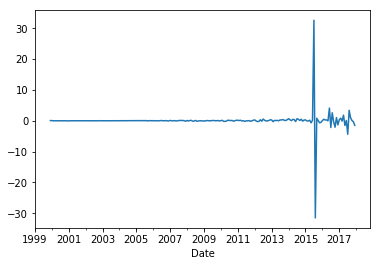

In [80]:
results.resid.plot()

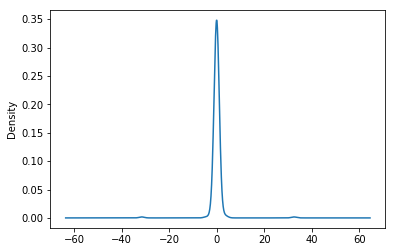

In [81]:
results.resid.plot(kind='kde')

In [82]:
len(df)

217

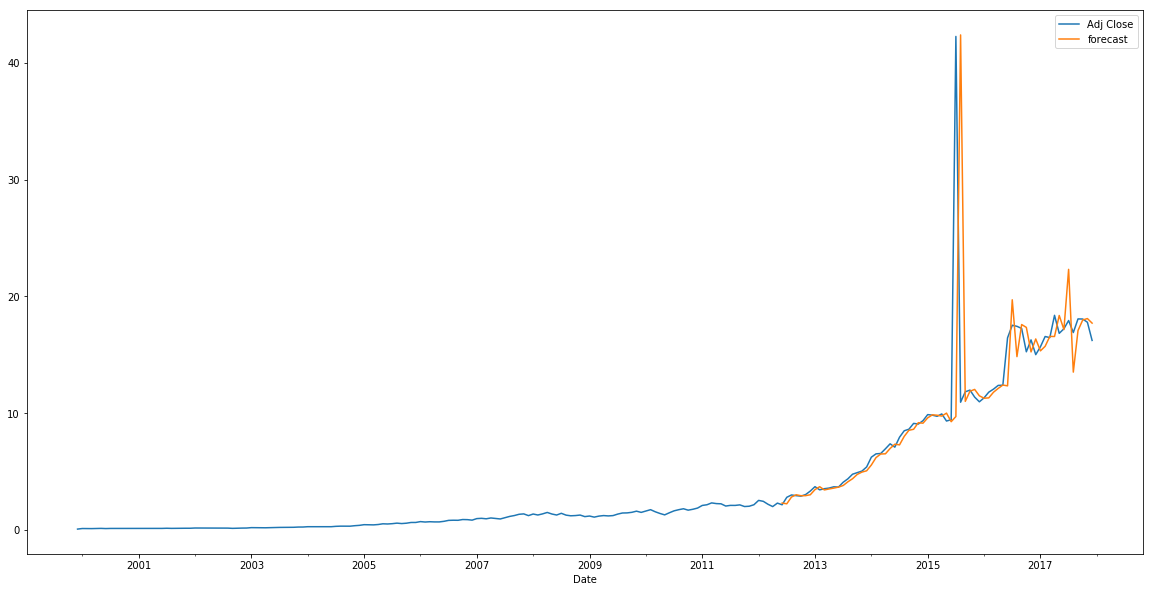

In [121]:
df['forecast'] = results.predict (start = 150, end = 217 )
df[['Adj Close', 'forecast']].plot(figsize = (20,10));

In [85]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,returns,forecast
Date,,,,,,,,
2017-08-31,18.830000,19.125000,17.465000,17.780001,16.896776,48996658,-0.057514,13.506665
2017-09-30,17.549999,19.125000,17.020000,19.010000,18.065674,36258955,0.069179,17.069842
2017-10-31,18.379999,19.004999,17.975000,19.000000,18.056171,35752906,-0.000526,17.970635
2017-11-30,19.004999,19.230000,18.389999,18.709999,17.780577,41576603,-0.015263,18.098333
2017-12-31,18.709999,18.965000,16.920000,17.070000,16.222044,50314936,-0.087654,17.704833


In [86]:
from pandas.tseries.offsets import DateOffset

In [87]:
future_dates = [df.index[-1] + DateOffset(months = x ) for x in range(1,24)]

In [88]:
future_dates

[Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-30 00:00:00'),
 Timestamp('2018-05-31 00:00:00'),
 Timestamp('2018-06-30 00:00:00'),
 Timestamp('2018-07-31 00:00:00'),
 Timestamp('2018-08-31 00:00:00'),
 Timestamp('2018-09-30 00:00:00'),
 Timestamp('2018-10-31 00:00:00'),
 Timestamp('2018-11-30 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-01-31 00:00:00'),
 Timestamp('2019-02-28 00:00:00'),
 Timestamp('2019-03-31 00:00:00'),
 Timestamp('2019-04-30 00:00:00'),
 Timestamp('2019-05-31 00:00:00'),
 Timestamp('2019-06-30 00:00:00'),
 Timestamp('2019-07-31 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 Timestamp('2019-09-30 00:00:00'),
 Timestamp('2019-10-31 00:00:00'),
 Timestamp('2019-11-30 00:00:00')]

In [89]:
future_df = pd.DataFrame(index = future_dates, columns = df.columns)

In [90]:
final_df = pd.concat([df,future_df])

In [94]:
final_df['forecast']= results.predict(start= 217, end=(217+24))

In [95]:
final_df.tail()

,Open,High,Low,Close,Adj Close,Volume,returns,forecast
2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.334388
2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.706070
2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.008071
2019-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.804201
2019-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.860563


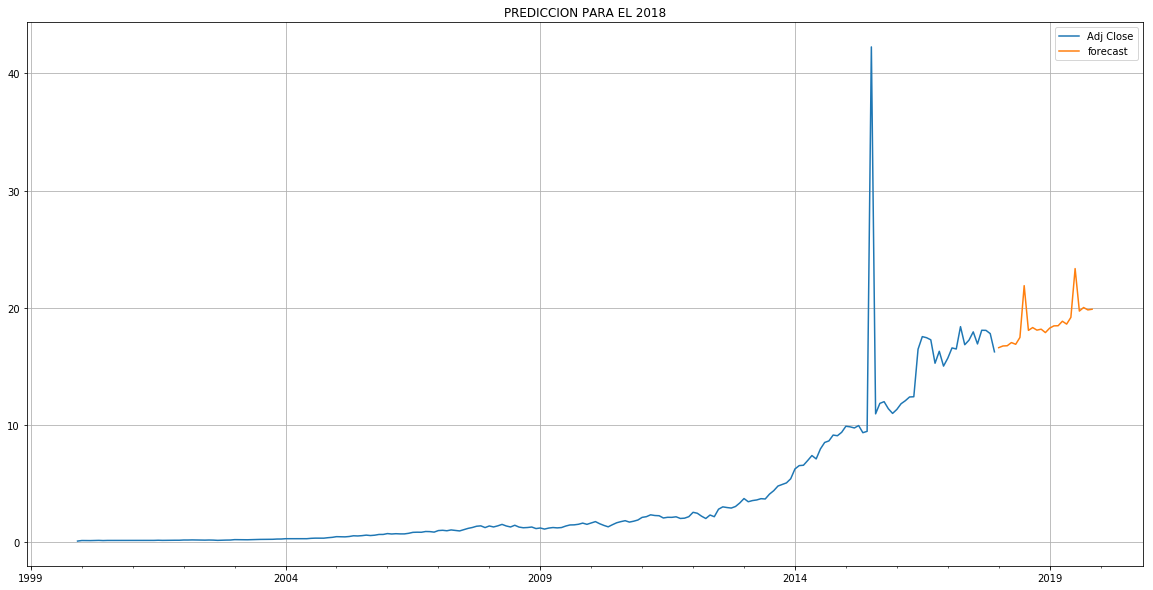

In [127]:
final_df['Adj Close'].plot(figsize=(20,10))
final_df['forecast'].plot()
plt.title('PREDICCION PARA EL 2018')
plt.grid()
plt.legend();

# forecast vs realidad

In [122]:
REE_2018 = pd.read_csv('REE.MC2018.csv', index_col = 'Date', parse_dates= True)
REE_2018

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,18.709999,18.965000,16.920000,18.445000,17.528740,55479046
2018-01-31,17.180000,17.434999,15.650000,16.000000,15.418269,41414156
2018-02-28,15.930000,16.920000,15.340000,16.730000,16.121727,42080919
2018-03-31,16.730000,17.280001,16.250000,17.280001,16.651731,27975764
2018-04-30,17.280001,17.584999,16.290001,16.650000,16.044636,33442259
2018-05-31,16.700001,18.379999,16.530001,17.440001,16.805914,87123617
2018-06-30,17.334999,18.379999,17.260000,18.139999,18.139999,55751444
2018-07-31,17.950001,18.580000,17.850000,18.325001,18.325001,20631713


In [131]:
final_df.loc['2018-01-31':,'forecast']
#DE ACUERDO AL FORECAST EL NIVEL 16.5 PARECE SER EL MAS BAJO SERIA BUEN PRECIO PARA COMPRAR
#puede tener al menos un upside de 2 euros si se compra a 16.5 

2018-01-31    16.579300
2018-02-28    16.723879
2018-03-31    16.741785
2018-04-30    17.013810
2018-05-31    16.865491
2018-06-30    17.453369
2018-07-31    21.876649
2018-08-31    18.056951
2018-09-30    18.295072
2018-10-31    18.076880
2018-11-30    18.157703
2018-12-31    17.867157
2019-01-31    18.246254
2019-02-28    18.441199
2019-03-31    18.451564
2019-04-30    18.835914
2019-05-31    18.591716
2019-06-30    19.166088
2019-07-31    23.334388
2019-08-31    19.706070
2019-09-30    20.008071
2019-10-31    19.804201
2019-11-30    19.860563
Name: forecast, dtype: float64

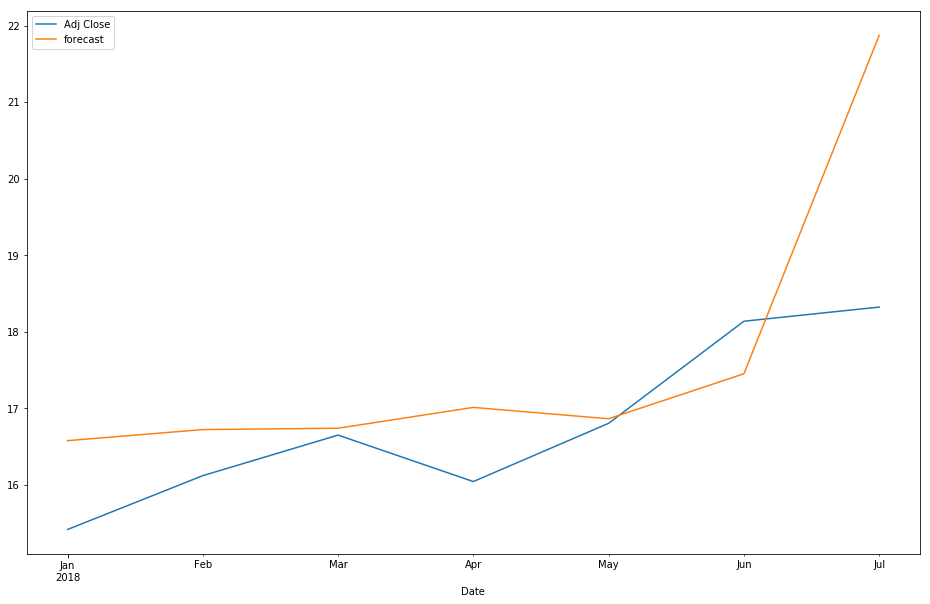

In [116]:
REE_2018.loc['2018-01-31':,'Adj Close'].plot(figsize = (16,10))
forecast_2018.plot()
plt.legend();